# Machine Learning From Scratch: Logistic Regression & Gradient Descent

## 1. Implementing logistic regression in python using batch gradient descent

### a) Initialising and visualising data
The data is taken from a Wikipedia page on logistic regression, and explores the probability of passing an exam given varying hours of studying (https://en.wikipedia.org/wiki/Logistic_regression#Probability_of_passing_an_exam_versus_hours_of_study).
It is split into test and train data, though these are not actually used in this instance, as the training is performed on the whole data set. 

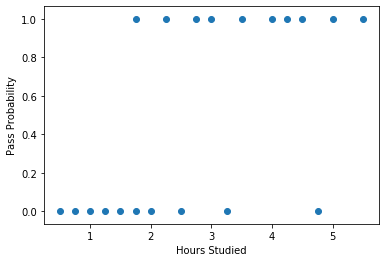

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
X = np.asarray ([[0.50], [0.75], [1.00], [1.25], [1.50], [1.75], [3.00], [4.75], [1.75], [3.25], [5.00], [2.00], [2.25], [2.50], [2.75], [3.50], [4.00], [4.25], [4.50], [5.50]])

# Create design matrix by prepending a column of ones to the data array
X = np.c_[np.ones((X.shape[0], 1)), X]

# Add a new axis to configure shape of (20,1)
y = np.asarray([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,0,1,0,1,1,1,1,1,1])[:, np.newaxis]

# Split into test and train
data_len = len(y)
nTestSamples = np.int(0.1*data_len)
idx_test = np.arange( nTestSamples)
idx_train = np.arange(idx_test[-1]+1, data_len)
X_test = X[idx_test]
X_train = X[idx_train]
y_test = y[idx_test]
y_train = y[idx_train]

# Plot the data
fig = plt.figure()
plt.scatter(X[:,1], y)
plt.xlabel('Hours Studied')
plt.ylabel('Pass Probability')
plt.show()

# ========= Printouts =========
#print("data len: ",data_len)
#print("nTestSamples: ",nTestSamples)
#print("idx_test:  ",idx_test)
#print("idx_test -1 + 1: ", idx_test[-1]+1)
#print("x test ", X_test)
#print("x train ", X_train)
#print("y test ", y_test)
#print("y train ", y_train)
#print("y shape: ",y.shape)

### b) Helper Function 1: Normalise data (centre around the mean)

This function re-maps the values in their relation to the mean, so that it conforms to the sigmoid equation. Since the function expects a design matrix (i.e. the data is preceded by a column of ones), it only processes the second column, before returning the full design matrix again. 

Normalise equation:
$ \Large X_{norm} = \frac{X - X_{min}}{ X_{max} - X_{min}} $




In [2]:
def centered(x):
    '''
    Takes in a design matrix x, and centres the data
    around the mean. 
    
            Parameters:
                    x (array): A design matrix representing the raw data
            Returns:
                    x (array): New design matrix where data is normalised,
                                or centered around the mean. 
    '''
    
    x[:,1] -= x[:,1].mean() 
    
    return x 


### Plotting new normalised data

<function matplotlib.pyplot.show(*args, **kw)>

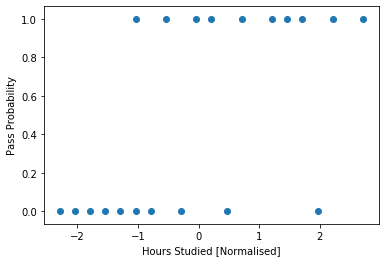

In [3]:
fig = plt.figure()
plt.scatter( centered(X)[:,1], y)
plt.xlabel('Hours Studied [Normalised]')
plt.ylabel('Pass Probability')
plt.show

### c) Helper Function 2: Sigmoid function (aka logistic function)

Sigmoid equation: $ \Large \:\:g(z) = \frac{1}{ 1\: +\: e^{-z }} $

In [4]:
def sigmoid(x, params):
    '''
    Takes in a dataset 'x' and parameters 'params',
    and outputs a value between 0 and 1, representing
    the probability that y is equal to 1. It calls the 
    previously defined "centered()" function, thus normalising
    the incoming data. Uses vectorisation to perform the 
    calculation.
    
                Paramaters:
                        x (array): A design matrix representing the dataset.
                        params (array): An array of values by which x is parameterised.
                Returns: 
                        result (array): An array of probability values between
                                        zero and one. 
    
    '''
    result = 1 / (1 + np.exp ( -1 * ( centered(x) @ params   )) )
    return result


### Visualising the cost function


/Users/martintownley/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


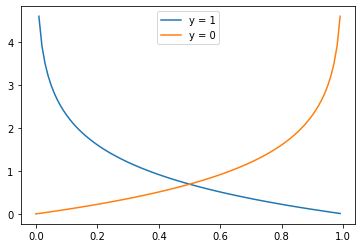

In [5]:

p = np.arange(0,1,0.01)
plt.plot(p, -1 * np.log(p), label = 'y = 1')

plt.plot(p, -1 * (np.log(1-p)), label = 'y = 0')
plt.legend()


plt.show()

### d) Helper Function 3: Loss function (cost function)


Loss function equation:
$ \large \:\:   J(\Theta) = \frac{1}{2m}\sum_{i=1}^m \:Cost(h_\Theta(x^{(i)}),y^{(i)})\:=\: \frac{1}{2m}\sum_{i=1}^m (\frac{1}{ 1\:+\:e ^{-\Theta T x^{(i)} }} \: - \: y^{(i)})^{2}  $

Cross-entropy loss function equation:

$ \large \:\: Cost(h_\Theta (x),y) \:\: -y \: \cdot \: log(h_\Theta (x)) \: - \: (1\:-\:y) \: \cdot \: log(1\:-\:h_\Theta (x))$


In [6]:
 def loss_func(hyp, target):
    '''
    Takes an array of probabilities, i.e. the output of the sigmoid function,
    and the target y values. It computes the average loss overa ll the individual
    loss values, returning a single value representing the loss / cost.
                
                Parameters:
                        hyp (array): An array of hypothesised probabilities.
                        target (array): An array representing the actual y values,
                                        or the target data.
                Returns:
                        loss (number): A value representing the loss/cost.
    '''
    
    # Desired shapes of hyp and target are (1,20) and (20,1) respectively,
    # so transpose the target. This allows vectorised computation. 
    
    return 1/m * (- target.T @ np.log(hyp) - (1 - target.T) @ np.log(1 - hyp ))

### e) Helper Function 4: Predictor function

In [7]:
def predictor(x):
    '''
    Takes in array of probabilities, i.e. the output of the sigmoid function,
    and rounds the value, thereby asserting the prediction of which class 
    each data point will fall into. 
                
                Parameters:
                        x (array): An array of hypothesised probabilities,
                                    between zero and one.
                Returns:
                        rounded x (array): An array of rounded values (0 or 1), denoting
                                    predicted class.
    '''
    return np.round(x)



### f) Helper Function 5: Gradient calculator
This function gets called within the overall log_reg function at the next stage. 

In [8]:
def gradient(params, x, target):
    '''
    Takes in a parameters vector, the design matrix data x,
    and the target values y. Creates a probability vector
    by calling the sigmoid function on x and params, and calculates
    the gradient of the loss given these values by a 
    vectorised computation.
    '''
    probVector = sigmoid(x, params)
    
    return (1/m) * (x.T @ (probVector - target))

### g) Putting it all together: The Logistic Regression Function

In [9]:
def log_reg(params, x, target, iterations, LR, LT):
    '''
    Takes in a parameters vector, the design matrix data x,
    the target y values, and number of iterations, and performs
    a logistic regression on the data. Inside a for loop, this function 
    first calculates the gradient by calling the "gradient" helper
    function(1) (which in turn calls the "sigmoid" function, which itself 
    in turn calls the "centered" function). It then updates the parameters
    by subtracting from themselves the learning rate multiplied by the gradient(2).
    After this, it calculates a new set of probabilities given the newly
    updated parameters(3), and from these calculates the cross-entropy loss
    using the "loss" function(4). The loss difference, "loss_diff" is calculated
    to determine by how much the loss value is changing between iterations,
    and these values are stored in a vector named "cost_record"(5).
    The accuracy of the probabilities are calculated at each iteration by 
    comparing predicted values (using the "predictor" function) with the target y
    values(6). Finally, a check is made to see whether the loss difference
    has fallen below a given loss threshold, at which point the loop is
    interupted and relevant data is reported (the iteration of convergence,
    the parameters, and the accuracy score).
                
                Parameters:
                        params (array): A vector of intiial theta values by which
                                        x is parameterised.
                        x (array): An array containing the raw data.
                        target (array): An array containing the target y values.
                        iterations (int): The maximum number of times the training loop
                                        will execute. 
                        LR (int): The learning rate of the logistic regression function.
                        LT (int): The loss threshold – training loop will break
                                        if the change in loss between iterations falls
                                        below this value.
                Returns:
                        params (array): A vector of the ideal parameters.
                        cost_record (array): An array of loss/cost values at each
                                        iteration.
                        i (int): The number of iterations before convergence.
                        accuracy (float): A floating point value between 0 and 1 
                                        expressing the accuracy of the model. 
                
    '''
    # Initialise learning rate
    alpha = LR
    
    # Initialise cost and accuracy record vectors
    cost_record = np.zeros((iterations,1))
    accuracy_record = np.zeros((iterations,1))
    
    # Initialise loss and previous loss values
    loss = 10
    prev_loss = 10
    
    # Initilise loss threshold
    lossThreshold = LT
    
    for i in range(iterations):
    
        # 1. get the gradient, given the parameters
        theGrad = gradient(params, x, target)
        #print("theGrad: ",theGrad)
        
        # 2. Update the parameters 
        params = params - alpha * theGrad
        #print("params: ", params)
        
        # 3. Make predictions given new parameters
        probs = sigmoid(x, params)
        #print("probs: ", probs)
        
        # 4. Calculate the loss of the previous predictions:
        loss = loss_func(probs, y)
        #print("loss: ", loss)
        
        loss_diff =  abs(np.float(prev_loss - loss))
        #print("loss diff: ",loss_diff)
        
        # 5. store the loss values
        cost_record[i] = loss
        
        # 6. Calculate the accuracy
        preds = predictor(probs)
        
        accuracy = float(sum(preds == target)) / float(m)
        #print("acc", accuracy)
        
        prev_loss = np.copy(loss)
        
        if loss_diff < lossThreshold:
            #print("threshold reached at iteration: ", (i))
            break
        
    return params, cost_record, (i), accuracy

### h) Calling the logistic regression function, graphing the loss
Here values are intialised for the variables involved in the logistic regression. Theta is initialised as [0, 0].

The cost is graphed against the number of iterations.


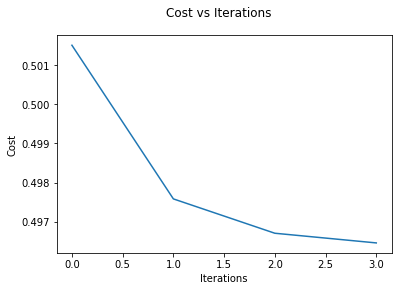

Converged at iteration 4 , with parameters  [[0.03557424]
 [1.04961544]]
Accuracy score at convergence:  0.75


In [10]:
# Initialise theta (parameters)
theta = np.array([[0], [0]])

# Set number of iterations/loops for the logistic regression function
loops = 10000

m = y.size

# Set the learning rate and loss threshold
learning_rate = 2
loss_threshold = 0.0002

# Call the function and assign to a variable
loggyReg = log_reg(theta, X, y, loops, learning_rate, loss_threshold)

convIter = loggyReg[2]

# Plot data of the logistic regression function, and print important information
fig = plt.figure()
p = np.arange(0, convIter)
fig.suptitle('Cost vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.plot(p, (loggyReg[1])[:(convIter)] )
plt.show()



print("Converged at iteration", loggyReg[2], ", with parameters ", loggyReg[0])
print("Accuracy score at convergence: ", loggyReg[3])

## Explanation
This notebook performs a logistic regression on a simple dataset, the probability of passing an exam versus hours of study.
It organises the data into a design matrix, thereby prepending the x array with a column of ones. This reflects the fact that x0 in a hypothesis function is always 1. It is therefore sometimes omitted from the equation, leaving theta0 by itself, since all it does is multiply theta0 by 1. However, in order to perform vectorised computations, we require the x0 values to be explicit. Vectorised computations allow matrix math to be performed at C-level, which is more efficient than python for loops. It also makes for more succinct and tidy code. 

The notebook defines a series of helper functions, which are all implicitly called from within the final log_reg function, so they do not need to be called separately.

In order for the data to conform to the sigmoid function, a “centered()” function is provided which normalises/centres the data around the mean.

A “sigmoid()” function is provided to map the dataset to values between zero and one, according to the sigmoid/logistic function equation. This outputs probabilities, between zero and one, that the data will fall into class 1, that of passing the exam. 

A “loss_func()” function is defined which calculates the overall loss value, given a hypothesised set of probabilities and the target y values. It performs a vectorised computation based on the cross-entropy cost equation. 

A “predictor()” function is defined to help determine accuracy of the model. It takes probability values determined by the sigmoid function, and rounds them to the nearest whole number, so that they become 0 or 1. In this way, these values act as predictions as to which class (pass or fail) the given data will fall into. The accuracy is calculated inside the main “log_reg()” function, by comparing the predicted values with the actual target data, and producing an accuracy score between 0 and 1. 

A “gradient()” function is defined to calculate the gradient of the loss function at each data point. This is also referred to as the derivative of the loss function. 

Finally, the “log_reg()” function puts everything together by performing gradient descent on the data, implicitly calling the helper functions to achieve this. 
